In [1]:
bra2import pandas as pd

In [2]:
iris=pd.read_csv('Data/iris_csv.csv')

In [3]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [15]:
inputs=iris[['sepallength','sepalwidth','petallength']]
outputs=iris[['petalwidth']]

In [37]:
inputs.values[0][0]

5.1

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

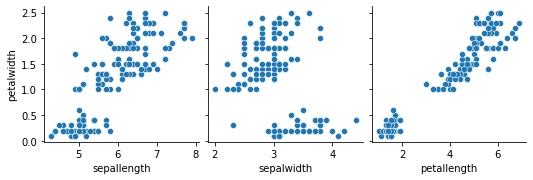

In [32]:
sns.pairplot(data=iris,x_vars=['sepallength', 'sepalwidth', 'petallength'], y_vars=['petalwidth'])
plt.show()

In [12]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(inputs, outputs, test_size=0.2)

In [17]:
reg=linear_model.LinearRegression()
reg=reg.fit(x_train, y_train)

In [19]:
y_pred=reg.predict(x_test)
y_pred[:5]

array([[0.28407278],
       [0.21818979],
       [1.23810405],
       [1.36645915],
       [0.23000197]])

In [20]:
df=pd.DataFrame({'Actual':pd.DataFrame(y_test.values)[0].values,'Predict':pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Predict
0,0.2,0.284073
1,0.1,0.218190
2,1.2,1.238104
3,1.4,1.366459
4,0.2,0.230002


In [25]:
# evaluate:
mean_squared_error(outputs, reg.predict(inputs))

0.03591484901366213

In [26]:
r2_score(y_test, y_pred)

0.9302190369522884

In [29]:
reg.score(x_test, y_test)

0.9302190369522884

In [30]:
reg.score(x_train, y_train)

0.9379662477877131

In [42]:
#coeeficient:
a=reg.coef_
b=reg.intercept_
a=np.array(a[0abl
b=np.array(b[0])

In [43]:
reg_line=[]
for val in inputs.values:
    for j in range(3):
        line=val[j]*a[j]
    reg_line.append(line+b)
reg_line[:5]
    

[0.5419704634616718,
 0.5419704634616718,
 0.48857837726842424,
 0.5953625496549193,
 0.5419704634616718]

In [48]:
#visualize:
y_train_pred=reg.predict(x_train)
y_test_pred=reg.predict(x_test)

/home/tonlee/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tonlee/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tonlee/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

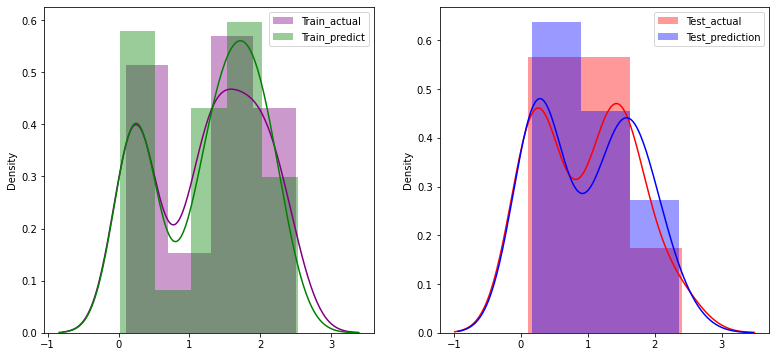

In [56]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
ax1=sns.distplot(y_train, color='purple', label='Train_actual')
sns.distplot(y_train_pred, color='green', label='Train_predict', ax=ax1)
plt.legend()
plt.subplot(1,2,2)
ax2=sns.distplot(y_test, color='r', label='Test_actual')
sns.distplot(y_test_pred, color='b', label='Test_prediction', ax=ax2)
plt.legend()
plt.show()

In [57]:
#make a predict:
x_new=[[4.5, 3.1, 1]]
y_new=reg.predict(x_new)

In [58]:
y_new

array([[0.04014072]])